In [21]:
import steam
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import json
from steam.api import interface
steam.api.key.set('FC864146AEF094845C669F86F0B20CFF')
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
steamid = '76561197974553664'
friends = steam.user.friend_list(steamid, relationship='all')
my_friend = []
for friend in friends:
    my = friend.steamid
    my_friend.append(my)
    
my_friend

[76561197963876634,
 76561197964893556,
 76561197971252641,
 76561197972100809,
 76561197972384491,
 76561197976404562,
 76561197977307864,
 76561197978413983,
 76561197978431979,
 76561197978441108,
 76561197979975870,
 76561197982933050,
 76561197991610157,
 76561197993235979,
 76561197993298262,
 76561197993699405,
 76561197993757326,
 76561197996410123,
 76561197997115692,
 76561198010901339,
 76561198029269257,
 76561198034070553,
 76561198034841259,
 76561198035337396,
 76561198036466697,
 76561198057490360,
 76561198067567760,
 76561198092975386,
 76561198439836794]

In [3]:
steamid = '76561197974553664'
friends = steam.user.friend_list(steamid, relationship='all')
my_friend = []
for friend in friends:
    my = friend.steamid
    my_friend.append(my)
    df = pd.DataFrame({'friend_out': my_friend})
    df['friend_in'] = steamid
    
df.head()

,friend_out,friend_in
0,76561197963876634,76561197974553664
1,76561197964893556,76561197974553664
2,76561197971252641,76561197974553664
3,76561197972100809,76561197974553664
4,76561197972384491,76561197974553664


In [4]:
friends = steam.user.friend_list('76561197974553664', relationship='all')
my_friend = []
for friend in friends:
    my = friend.steamid
    my_friend.append(my)
    
my_friend.remove(76561198057490360)

In [5]:

my_friend
my_friends = []
f_of_f = []
#df = pd.DataFrame()

for friend in my_friend:
    friend_of_friends = steam.user.friend_list(friend)
    print(friend_of_friends.count)
    for new_friends in friend_of_friends:
        my = new_friends.steamid
        my_friends.append(my)
        df = pd.DataFrame({'friend_out': my_friends})
        
df

30
17
36
49
72
58
50
20
25
29
62
224
205
25
102
15
35
18
35
4
223
101
12
23
13
4
13
19


,friend_out
0,76561197960869361
1,76561197960869554
2,76561197961886330
3,76561197963531856
4,76561197963593716
5,76561197963596452
6,76561197963600137
7,76561197967434927
8,76561197972100809
9,76561197972760387


In [6]:
#df.to_csv('friends_list.csv')

In [7]:
games = interface('IPlayerService').GetOwnedGames(steamid=76561197974553664, include_appinfo=1)
my_games = games['response']['games']
my_games

[{'appid': 220,
  'name': 'Half-Life 2',
  'playtime_forever': 57,
  'img_icon_url': 'fcfb366051782b8ebf2aa297f3b746395858cb62',
  'img_logo_url': 'e4ad9cf1b7dc8475c1118625daf9abd4bdcbcad0',
  'has_community_visible_stats': True},
 {'appid': 240,
  'name': 'Counter-Strike: Source',
  'playtime_forever': 237,
  'img_icon_url': '9052fa60c496a1c03383b27687ec50f4bf0f0e10',
  'img_logo_url': 'ee97d0dbf3e5d5d59e69dc20b98ed9dc8cad5283',
  'has_community_visible_stats': True},
 {'appid': 320,
  'name': 'Half-Life 2: Deathmatch',
  'playtime_forever': 2,
  'img_icon_url': '795e85364189511f4990861b578084deef086cb1',
  'img_logo_url': '6dd9f66771300f2252d411e50739a1ceae9e5b30',
  'has_community_visible_stats': True},
 {'appid': 340,
  'name': 'Half-Life 2: Lost Coast',
  'playtime_forever': 0,
  'img_icon_url': '795e85364189511f4990861b578084deef086cb1',
  'img_logo_url': '867cce5c4f37d5ed4aeffb57c60e220ddffe4134',
  'has_community_visible_stats': True},
 {'appid': 1520,
  'name': 'DEFCON',
  'pl

In [8]:
for game in my_games:
    game.update({"friend_ID": 76561197974553664})

In [9]:
game_table = pd.DataFrame(my_games)
game_table = game_table.sort_values(by=['playtime_forever'], ascending=False)
game_table = game_table.fillna(0)
game_table = game_table.drop(['has_community_visible_stats', 'img_icon_url', 'img_logo_url'], axis=1)

In [10]:
game_table.dtypes


appid                 int64
friend_ID             int64
name                 object
playtime_2weeks     float64
playtime_forever      int64
dtype: object

In [11]:
steam_games = pd.read_csv('steam_games_all_fields.csv', index_col=0, delimiter='\t')
app_id = steam_games['steam_url'].str.split('/',expand=True)
app_id = app_id.drop([0, 1, 2, 5, 6], axis=1)
app_id.columns = ['app', 'appid']
df = pd.concat([steam_games, app_id], axis=1, sort=False)
df = df[~df.app.str.contains('sub')]
df = df[~df.app.str.contains('digitalgiftcards')]
df['appid'] = pd.to_numeric(df['appid'], downcast='signed')
df['number_of_review'] = df['number_of_review'].replace({'no reviews' : ''})
df['number_of_review'] = pd.to_numeric(df['number_of_review'], downcast='signed')
df['score'] = df['score'].replace({'no rating' : ''})
df['score'] = pd.to_numeric(df['score'], downcast='signed')
df = pd.merge(df, game_table, on='appid')
df = df.drop(['app', 'name', 'friend_ID', 'playtime_2weeks'], axis=1)
df.count()

game_title          223
steam_url           223
tags                223
image               223
description         223
number_of_review    223
score               223
release_date        223
appid               223
playtime_forever    223
dtype: int64

In [12]:
df2 = df[df['playtime_forever'] > 60]
df2 = df2[df2['score'] != np.nan]
df2 = df2[df2['number_of_review'] != np.nan]
df2.sort_values('number_of_review')

,game_title,steam_url,tags,image,description,number_of_review,score,release_date,appid,playtime_forever
217,Trackmania² Lagoon,https://store.steampowered.com/app/600720/Trac...,"Racing, Sports, Multiplayer, Arcade",https://steamcdn-a.akamaihd.net/steam/apps/600...,Trackmania² Lagoon has you racing on raised tr...,180.00,6.00,"May 23, 2017",600720,368
189,Trackmania® Turbo,https://store.steampowered.com/app/375900/Trac...,"Racing, Level Editor, Arcade, Massively Multip...",https://steamcdn-a.akamaihd.net/steam/apps/375...,Trackmania offers you the ultimate arcade raci...,"1,103.00",6.00,"Mar 24, 2016",375900,480
190,Trials Evolution: Gold Edition,https://store.steampowered.com/app/220160/Tria...,"Racing, Action, Level Editor, Multiplayer, Pla...",https://steamcdn-a.akamaihd.net/steam/apps/220...,Trials Evolution: Gold Edition marks the Trial...,"1,629.00",7.00,"Mar 21, 2013",220160,245
173,DEFCON,https://store.steampowered.com/app/1520/DEFCON...,"Strategy, Indie, Multiplayer, Wargame, Cold Wa...",https://steamcdn-a.akamaihd.net/steam/apps/152...,"Inspired by the 1983 cult classic film, Wargam...","1,756.00",9.00,"Sep 29, 2006",1520,202
95,Thumper,https://store.steampowered.com/app/356400/Thum...,"Rhythm, Indie, Action, Psychedelic, Great Soun...",https://steamcdn-a.akamaihd.net/steam/apps/356...,Thumper is rhythm violence: classic rhythm-act...,"1,879.00",9.00,"Oct 10, 2016",356400,126
177,Batman: The Enemy Within - The Telltale Series,https://store.steampowered.com/app/675260/Batm...,"Adventure, Story Rich, Batman, Choices Matter,...",https://steamcdn-a.akamaihd.net/steam/apps/675...,In this latest chapter from the award-winning ...,"2,296.00",9.00,"Aug 8, 2017",675260,547
182,Dungeons of Dredmor,https://store.steampowered.com/app/98800/Dunge...,"Rogue-like, Turn-Based, RPG, Indie, Dungeon Cr...",https://steamcdn-a.akamaihd.net/steam/apps/988...,Test your luck and cunning in this exciting RP...,"2,679.00",9.00,"Jul 13, 2011",98800,237
172,TrackMania² Stadium,https://store.steampowered.com/app/232910/Trac...,"Racing, Multiplayer, Level Editor, Time Attack...",https://steamcdn-a.akamaihd.net/steam/apps/232...,TrackMania² Stadium is the return of the popul...,"2,750.00",9.00,"Feb 27, 2013",232910,1858
162,ENSLAVED™: Odyssey to the West™ Premium Edition,https://store.steampowered.com/app/245280/ENSL...,"Adventure, Action, Post-apocalyptic, Singlepla...",https://steamcdn-a.akamaihd.net/steam/apps/245...,"Follow a gripping, surprise-filled journey as ...","3,059.00",9.00,"Oct 24, 2013",245280,216
8,HITMAN™ 2,https://store.steampowered.com/app/863550/HITM...,"Stealth, Action, Singleplayer, Multiplayer, As...",https://steamcdn-a.akamaihd.net/steam/apps/863...,Travel the globe and track your targets across...,"3,287.00",9.00,"Nov 13, 2018",863550,821


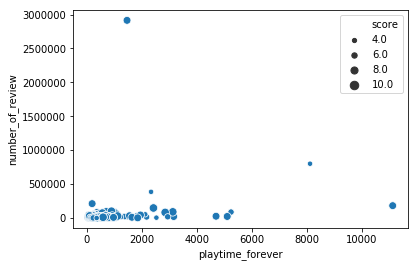

In [13]:
ax = sns.scatterplot(x="playtime_forever", y="number_of_review", size="score", 
                     data=df2)

In [1]:
df_csno = df2[~df2.game_title.str.contains('Counter-Strike: Global Offensive')]

ax = sns.scatterplot(x="playtime_forever", y="number_of_review", hue="score", 
                     data=df_csno)

NameError: name 'df2' is not defined

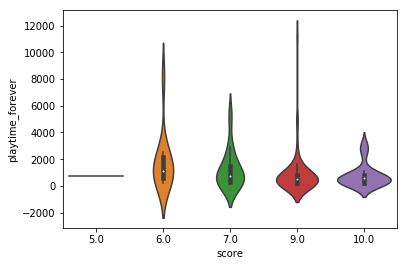

In [15]:
ax = sns.violinplot(x="score", y="playtime_forever", data=df2)

In [16]:
df2[df2['score']==9]

,game_title,steam_url,tags,image,description,number_of_review,score,release_date,appid,playtime_forever
0,Counter-Strike: Global Offensive,https://store.steampowered.com/app/730/Counter...,"FPS, Multiplayer, Shooter, Action, Team-Based,...",https://steamcdn-a.akamaihd.net/steam/apps/730...,Counter-Strike: Global Offensive (CS: GO) expa...,"2,915,091.00",9.00,"Aug 21, 2012",730,1471
1,Rocket League®,https://store.steampowered.com/app/252950/Rock...,"Multiplayer, Racing, Soccer, Sports, Competiti...",https://steamcdn-a.akamaihd.net/steam/apps/252...,Soccer meets driving once again in the long-aw...,"182,330.00",9.00,"Jul 7, 2015",252950,11114
5,The Elder Scrolls V: Skyrim Special Edition,https://store.steampowered.com/app/489830/The_...,"Open World, RPG, Adventure, Singleplayer, Fant...",https://steamcdn-a.akamaihd.net/steam/apps/489...,Winner of more than 200 Game of the Year Award...,"12,634.00",9.00,"Oct 27, 2016",489830,388
6,The Forest,https://store.steampowered.com/app/242760/The_...,"Survival, Open World, Horror, Crafting, Advent...",https://steamcdn-a.akamaihd.net/steam/apps/242...,"As the lone survivor of a passenger jet crash,...","96,179.00",9.00,"Apr 30, 2018",242760,719
7,Subnautica,https://store.steampowered.com/app/264710/Subn...,"Survival, Open World, Exploration, Crafting, U...",https://steamcdn-a.akamaihd.net/steam/apps/264...,Descend into the depths of an alien underwater...,"82,103.00",9.00,"Jan 23, 2018",264710,382
8,HITMAN™ 2,https://store.steampowered.com/app/863550/HITM...,"Stealth, Action, Singleplayer, Multiplayer, As...",https://steamcdn-a.akamaihd.net/steam/apps/863...,Travel the globe and track your targets across...,"3,287.00",9.00,"Nov 13, 2018",863550,821
13,DARK SOULS™ III,https://store.steampowered.com/app/374320/DARK...,"Dark Fantasy, Difficult, RPG, Atmospheric, Lor...",https://steamcdn-a.akamaihd.net/steam/apps/374...,Dark Souls continues to push the boundaries wi...,"66,717.00",9.00,"Apr 11, 2016",374320,465
14,Rise of the Tomb Raider™,https://store.steampowered.com/app/391220/Rise...,"Adventure, Action, Lara Croft, Female Protagon...",https://steamcdn-a.akamaihd.net/steam/apps/391...,Rise of the Tomb Raider: 20 Year Celebration i...,"34,947.00",9.00,"Feb 9, 2016",391220,792
15,Dying Light,https://store.steampowered.com/app/239140/Dyin...,"Zombies, Survival, Open World, Parkour, Co-op,...",https://steamcdn-a.akamaihd.net/steam/apps/239...,"Dying Light is a first-person, action survival...","55,745.00",9.00,"Jan 26, 2015",239140,325
17,Dead Cells,https://store.steampowered.com/app/588650/Dead...,"Rogue-like, Pixel Graphics, Metroidvania, Rogu...",https://steamcdn-a.akamaihd.net/steam/apps/588...,"Dead Cells is a rogue-lite, metroidvania inspi...","21,614.00",9.00,"Aug 6, 2018",588650,397


In [17]:
df.describe()

,number_of_review,score,appid,playtime_forever
count,223.00,223.00,223.00,223.00
mean,"37,912.02",8.65,"213,820.36",543.99
std,"204,177.59",1.21,"174,569.86","1,198.67"
min,180.00,5.00,220.00,0.00
25%,"3,743.00",9.00,"45,360.00",0.00
50%,"11,004.00",9.00,"214,770.00",132.00
75%,"22,793.50",9.00,"292,770.00",600.50
max,"2,915,091.00",10.00,"863,550.00","11,114.00"


In [18]:
friends = steam.user.friend_list('76561197974553664')
my_friend = []
for friend in friends:
    my = friend.steamid
    my_friend.append(my)
    
my_friend

[76561197963876634,
 76561197964893556,
 76561197971252641,
 76561197972100809,
 76561197972384491,
 76561197976404562,
 76561197977307864,
 76561197978413983,
 76561197978431979,
 76561197978441108,
 76561197979975870,
 76561197982933050,
 76561197991610157,
 76561197993235979,
 76561197993298262,
 76561197993699405,
 76561197993757326,
 76561197996410123,
 76561197997115692,
 76561198010901339,
 76561198029269257,
 76561198034070553,
 76561198034841259,
 76561198035337396,
 76561198036466697,
 76561198057490360,
 76561198067567760,
 76561198092975386,
 76561198439836794]

In [19]:
all_friends = []
full_friend_table = pd.DataFrame()
for friends in my_friend:
    friend_games = interface('IPlayerService').GetOwnedGames(steamid=friends, include_appinfo=1)
    friend_games = friend_games['response']['games']
    for friend_game in friend_games:
        friend_game.update({"friend_ID":friends})
    all_friends.append(friend_games)

In [20]:
flat_list = [item for sublist in all_friends for item in sublist]
full_friend_list_games = pd.DataFrame(flat_list)
full_friend_list_games = full_friend_list_games[full_friend_list_games['playtime_forever'] > 60]
edges = full_friend_list_games[['friend_ID', 'appid']]
nodes = full_friend_list_games[['appid', 'name']]
edges.to_csv('networkx_edges.csv', index=None, header=['Source', 'Target'])
nodes.to_csv('gephi_nodes.csv', index=None)